In [22]:
def count_points_in_bin(file_path):
    # 打开文件
    with open(file_path, 'rb') as file:
        # 读取文件内容
        data = file.read()
        
        # 计算点的数量
        # 每个点由4个浮点数表示，每个浮点数占4字节
        num_points = len(data) // (4 * 4)
        
    return num_points

# 使用函数计算点数
file_path = '/home/soft/code/MambaMOS/data/semantic_kitti/sequences/01/velodyne/000000.bin'  # 替换为你的文件路径
num_points = count_points_in_bin(file_path)

# 打印点数
print(f"The number of points in the bin file: {num_points}")

The number of points in the bin file: 122829


In [23]:
import torch

In [3]:
p = torch.tensor([[  0,   1,   4,   5,   2,   3,   6,   7,   8,  12,  10,  14,  32,  33, 
          34,  35,  40,  42,  16,  17,  20,  21,  24,  28,  48,  49,  56,  64,
          65,  68,  69,  66,  67,  70,  71,  72,  76,  74,  78,  96,  97,  98,
          99, 102, 103, 104, 106, 110,  80,  81,  84,  85,  86,  87,  88,  92,
         112, 113, 116, 117, 114, 115, 120, 124, 128, 129, 132, 133, 130, 131,
         134, 135, 136, 140, 138, 142, 160, 161, 165, 162, 163, 166, 167, 168,
         172, 170, 174, 144, 145, 148, 149, 151, 152, 156, 158, 176, 177, 180,
         181, 179, 184, 188, 186, 192, 193, 196, 197, 194, 195, 198, 199, 200,
         204, 202, 206, 224, 225, 226, 227, 232, 234, 208, 209, 212, 213, 216,
         220, 240, 241, 248],
        [  0,   7,   3,   4,   1,   6,   2,   5,   8,  11,  15,  12,  60,  59,
          61,  58,  52,  51,  30,  25,  31,  24,  16,  23,  32,  39,  40,  64,
          71,  67,  68,  65,  70,  66,  69,  72,  75,  79,  76, 124, 123, 125,
         122, 126, 121, 116, 115, 112,  94,  89,  95,  88,  92,  91,  80,  87,
          96, 103,  97, 102,  99, 100, 104, 111, 128, 135, 131, 132, 129, 134,
         130, 133, 136, 139, 143, 140, 188, 187, 184, 189, 186, 190, 185, 180,
         183, 179, 176, 158, 153, 159, 152, 155, 144, 151, 148, 160, 167, 161,
         166, 164, 168, 175, 171, 192, 199, 195, 196, 193, 198, 194, 197, 200,
         203, 207, 204, 252, 251, 253, 250, 244, 243, 222, 217, 223, 216, 208,
         215, 224, 231, 232],
        [  0,   1,   2,   3,   4,   5,   6,   7,   8,  10,  12,  14,  16,  17,
          20,  21,  24,  28,  32,  33,  34,  35,  40,  42,  48,  49,  56,  64,
          65,  66,  67,  68,  69,  70,  71,  72,  74,  76,  78,  80,  81,  84,
          85,  86,  87,  88,  92,  94,  96,  97,  98,  99, 102, 103, 104, 106,
         112, 113, 114, 115, 116, 117, 120, 122, 128, 129, 130, 131, 132, 133,
         134, 135, 136, 138, 140, 142, 144, 145, 147, 148, 149, 150, 151, 152,
         154, 156, 158, 160, 161, 162, 163, 167, 168, 170, 174, 176, 177, 178,
         179, 181, 184, 186, 188, 192, 193, 194, 195, 196, 197, 198, 199, 200,
         202, 204, 206, 208, 209, 212, 213, 216, 220, 224, 225, 226, 227, 232,
         234, 240, 241, 248],
        [  0,   7,   1,   6,   3,   4,   2,   5,   8,  15,  11,  12,  30,  25,
          31,  24,  16,  23,  60,  59,  61,  58,  52,  51,  32,  39,  40,  64,
          71,  65,  70,  67,  68,  66,  69,  72,  79,  75,  76,  94,  89,  95,
          88,  92,  91,  80,  87,  84, 124, 123, 125, 122, 126, 121, 116, 115,
          96, 103,  99, 100,  97, 102, 104, 107, 128, 135, 129, 134, 131, 132,
         130, 133, 136, 143, 139, 140, 158, 153, 154, 159, 152, 156, 155, 144,
         147, 151, 148, 188, 187, 189, 186, 185, 180, 179, 176, 160, 167, 163,
         164, 166, 168, 171, 175, 192, 199, 193, 198, 195, 196, 194, 197, 200,
         207, 203, 204, 222, 217, 223, 216, 208, 215, 252, 251, 253, 250, 244,
         243, 224, 231, 232]], device='cuda:0')

In [27]:
def decide_shift_amount(code):
    # 使用torch.where来根据条件选择不同的右移位数
    return torch.where(code < 32, 0,
                       torch.where(code < 64, 1,
                                  torch.where(code < 128, 2, 3)))

In [26]:
decide_shift_amount(p)

TypeError: where() received an invalid combination of arguments - got (numpy.ndarray, int, int), but expected one of:
 * (Tensor condition)
 * (Tensor condition, Tensor input, Tensor other, *, Tensor out)
 * (Tensor condition, Number self, Tensor other)
      didn't match because some of the arguments have invalid types: (!numpy.ndarray!, !int!, !int!)
 * (Tensor condition, Tensor input, Number other)
      didn't match because some of the arguments have invalid types: (!numpy.ndarray!, !int!, !int!)
 * (Tensor condition, Number self, Number other)
      didn't match because some of the arguments have invalid types: (!numpy.ndarray!, !int!, !int!)


In [21]:
import numpy as np
events = np.load("/media/sdb2/grs/data/sythetic/sythetic/merge_data/40mm/0000000141.npz")
# events = np.load("/media/sdb2/grs/data/EVT3/scene2/merge_data/rain_3/0000000034.npz")

In [19]:
def render(x, y, t, p, shape):
    # 将极性从 {1, -1} 映射到 {0, 1}，以适应图像渲染
    p = (p > 0).astype(int)
    img = np.full(shape=shape + [3], fill_value=255, dtype="uint8")
    img[y, x, :] = 0
    img[y, x, p] = 255
    return img

In [24]:
x = events['x']
y = events['y']
t = events['t']
p = events['p']
x.shape

(106793,)

In [10]:
# 打印前10行数据
print("First 10 events:")
for i in range(min(10, len(x))):
    print(f"Event {i+1}: x={x[i]}, y={y[i]}, t={t[i]}, p={p[i]}")

First 10 events:
Event 1: x=1118, y=605, t=3400000, p=-1
Event 2: x=753, y=629, t=3400000, p=-1
Event 3: x=500, y=637, t=3400000, p=-1
Event 4: x=605, y=118, t=3400000, p=-1
Event 5: x=806, y=177, t=3400000, p=-1
Event 6: x=1014, y=139, t=3400000, p=-1
Event 7: x=1118, y=605, t=3400000, p=-1
Event 8: x=753, y=629, t=3400000, p=-1
Event 9: x=500, y=637, t=3400000, p=-1
Event 10: x=605, y=118, t=3400001, p=-1


In [11]:
len(x)

950940

In [12]:
x = (x * 460).astype(int)
y = (y * 352).astype(int)

In [13]:
x.max()

65404

In [14]:
y.max()

65472

In [15]:
t.max()

3499999

In [16]:
t.min()

3400000

In [17]:
t.max() - t.min()

99999

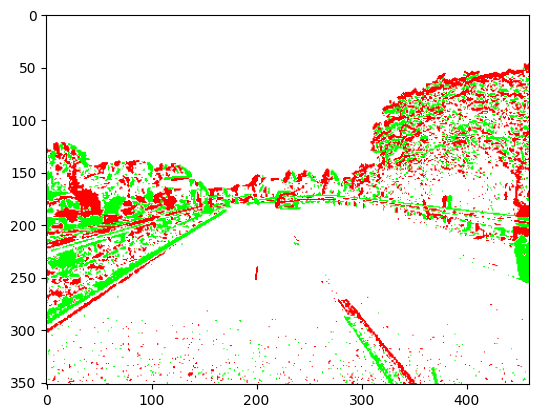

In [12]:
import matplotlib.pyplot as plt
shape = [352, 460]
img = render(x=x, y=y, t=t, p=p, shape=shape)
handle = plt.imshow(img)
plt.show(block=False)
plt.pause(0.002)

In [9]:
def get_learning_map(ignore_index):
        learning_map = {
            0: ignore_index,  # "unlabeled"
            1: ignore_index,  # "outlier" mapped to "unlabeled" --------------------------mapped
            9: 1,
            10: 2,  # "car"
            11: 2,  # "bicycle"
            13: 2,  # "bus" mapped to "other-vehicle" --------------------------mapped
            15: 2,  # "motorcycle"
            16: 2,  # "on-rails" mapped to "other-vehicle" ---------------------mapped
            18: 2,  # "truck"
            20: 2,  # "other-vehicle"
            30: 2,  # "person"
            31: 2,  # "bicyclist"
            32: 2,  # "motorcyclist"
            40: 1,  # "road"
            44: 1,  # "parking"
            48: 1,  # "sidewalk"
            49: 1,  # "other-ground"
            50: 1,  # "building"
            51: 1,  # "fence"
            52: 1,  # "other-structure" mapped to "unlabeled" ------------------mapped
            60: 1,  # "lane-marking" to "road" ---------------------------------mapped
            70: 1,  # "vegetation"
            71: 1,  # "trunk"
            72: 1,  # "terrain"
            80: 1,  # "pole"
            81: 1,  # "traffic-sign"
            99: 1,  # "other-object" to "unlabeled" ----------------------------mapped
            250: 2,
            251: 3,
            252: 3,  # "moving-car" to "car" ------------------------------------mapped
            253: 3,  # "moving-bicyclist" to "bicyclist" ------------------------mapped
            254: 3,  # "moving-person" to "person" ------------------------------mapped
            255: 3,  # "moving-motorcyclist" to "motorcyclist" ------------------mapped
            256: 3,  # "moving-on-rails" mapped to "other-vehicle" --------------mapped
            257: 3,  # "moving-bus" mapped to "other-vehicle" -------------------mapped
            258: 3,  # "moving-truck" to "truck" --------------------------------mapped
            259: 3,  # "moving-other"-vehicle to "other-vehicle" ----------------mapped
        }

        return learning_map

In [10]:
import numpy as np

# 读取 .label 文件
label_file = "/home/soft/code/MambaMOS/data/semantic_kitti/sequences/01/labels/000000.label"

# 使用 numpy 加载标签
segment = np.fromfile(label_file, dtype=np.int32).reshape(-1) & 0xFFFF
segment = np.vectorize(get_learning_map(ignore_index=True).__getitem__)(segment).astype(np.int32)

In [12]:
segment

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [16]:
import csv
csv_file_path = '/home/grs/data/derain/recording_2024-12-25_15-16-22.csv'

In [17]:
# 打开 CSV 文件并读取前几行
with open(csv_file_path, 'r') as file:
    reader = csv.reader(file)
    for i, row in enumerate(reader):
        if i < 25:  # 打印前25行来查看格式：x;y;polarity(01);timestamp
            print(row)
        if i == 24:
            break

['500', '637', '0', '10203328']
['806', '177', '0', '10203328']
['1118', '605', '0', '10203328']
['500', '637', '0', '10203328']
['806', '177', '0', '10203328']
['1118', '605', '0', '10203328']
['500', '637', '0', '10203328']
['806', '177', '0', '10203328']
['1118', '605', '0', '10203328']
['500', '637', '0', '10203329']
['806', '177', '0', '10203329']
['1118', '605', '0', '10203329']
['500', '637', '0', '10203329']
['806', '177', '0', '10203329']
['1118', '605', '0', '10203329']
['500', '637', '0', '10203329']
['806', '177', '0', '10203329']
['1118', '605', '0', '10203329']
['500', '637', '0', '10203329']
['806', '177', '0', '10203330']
['1118', '605', '0', '10203330']
['500', '637', '0', '10203330']
['806', '177', '0', '10203330']
['1158', '249', '1', '10203330']
['1118', '605', '0', '10203330']


In [14]:
# 存储不符合格式的行
invalid_rows = []
# 打开 CSV 文件并检查格式
with open(csv_file_path, 'r') as file:
    reader = csv.reader(file, delimiter=';')
    for i, row in enumerate(reader):
        # 检查每行是否正好有四个值
        if len(row) != 4:
            invalid_rows.append((i + 1, row))  # +1 因为行索引从 1 开始
        if i == 100:
            break

In [15]:
# 打印结果
if invalid_rows:
    print(f"Found {len(invalid_rows)} rows with incorrect format:")
    for row_index, row in invalid_rows:
        print(f"Row {row_index}: {row}")
else:
    print("All rows have the correct format: x;y;polarity;timestamp")

Found 101 rows with incorrect format:
Row 1: ['500,637,0,10203328']
Row 2: ['806,177,0,10203328']
Row 3: ['1118,605,0,10203328']
Row 4: ['500,637,0,10203328']
Row 5: ['806,177,0,10203328']
Row 6: ['1118,605,0,10203328']
Row 7: ['500,637,0,10203328']
Row 8: ['806,177,0,10203328']
Row 9: ['1118,605,0,10203328']
Row 10: ['500,637,0,10203329']
Row 11: ['806,177,0,10203329']
Row 12: ['1118,605,0,10203329']
Row 13: ['500,637,0,10203329']
Row 14: ['806,177,0,10203329']
Row 15: ['1118,605,0,10203329']
Row 16: ['500,637,0,10203329']
Row 17: ['806,177,0,10203329']
Row 18: ['1118,605,0,10203329']
Row 19: ['500,637,0,10203329']
Row 20: ['806,177,0,10203330']
Row 21: ['1118,605,0,10203330']
Row 22: ['500,637,0,10203330']
Row 23: ['806,177,0,10203330']
Row 24: ['1158,249,1,10203330']
Row 25: ['1118,605,0,10203330']
Row 26: ['500,637,0,10203330']
Row 27: ['806,177,0,10203330']
Row 28: ['1118,605,0,10203330']
Row 29: ['500,637,0,10203331']
Row 30: ['806,177,0,10203331']
Row 31: ['1118,605,0,10203331']

In [4]:
import numpy as np
events = np.load("/media/sdb2/grs/data/EVT3/scene2/merge_data/rain_3/0000000034.npz")
(events['t'][-1])-(events['t'][0])/1e9

3499998.9966

In [6]:
import numpy as np
events = np.load("/media/sdb2/grs/data/sythetic/sythetic/merge_data/1mm/0000000003.npz")
(events['t'][-1])-(events['t'][0])/1e9

797323967.3062971